In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

READING THE FILE

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


CHECKING FOR ALL NULL VALUES

In [3]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<Axes: >

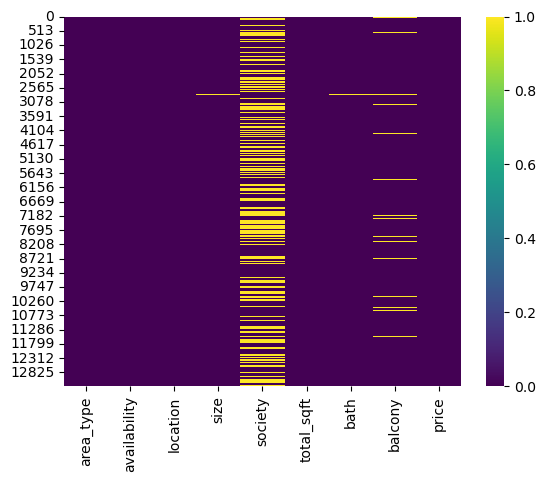

In [4]:
sns.heatmap(df.isnull(),cbar = True, cmap='viridis')

CLEANING DATA - NULL VALUES

In [5]:
df_1 = df.copy()
df_1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


1) Dropping society column

In [6]:
df_1.drop('society', axis=1, inplace=True)
df_1

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


<Axes: >

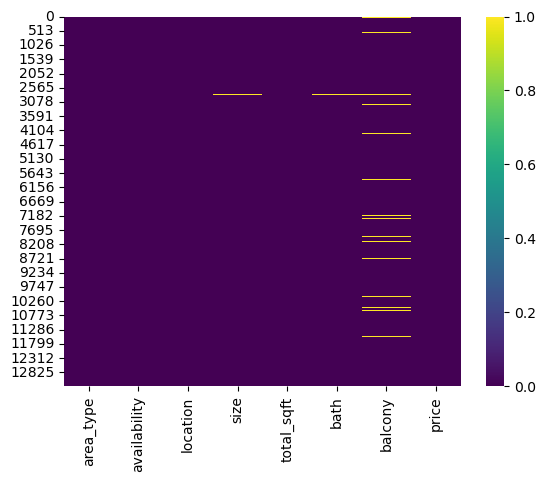

In [7]:
sns.heatmap(df_1.isnull(),cbar = True, cmap='viridis')

In [8]:
df_1.isnull().sum()
df_1

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


2) Balcony - replacing by most_freq

In [9]:
df_si = SimpleImputer(strategy='most_frequent', add_indicator=True)
df_si.fit_transform(df_1[['balcony']])

array([[1., 0.],
       [3., 0.],
       [3., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [10]:
df_2 = df_1.copy()
df_2['balcony'] = df_si.fit_transform(df_1[['balcony']])
df_2

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [11]:
df_2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

3) Since these Nan values are much less in count, we can remove all of them

In [12]:
df_3 = df_2.copy()
df_3.dropna(inplace=True)
df_3

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [13]:
df_3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

All null values are gone

<Axes: >

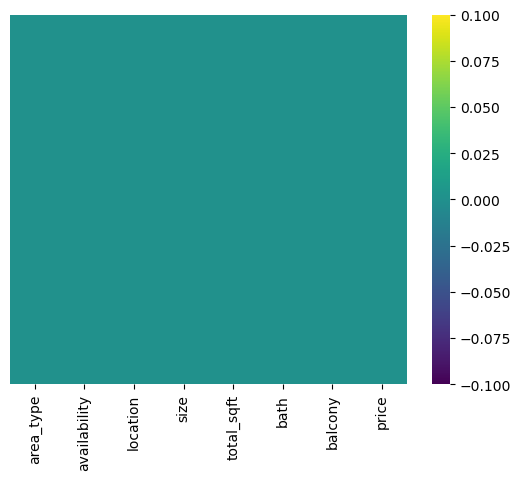

In [14]:
sns.heatmap(df_3.isnull(),yticklabels=False, cbar = True, cmap='viridis')

Now I want to see the unique values present in the columns, if they are way to high then we have to deal with it

In [15]:
(df_3.area_type.value_counts())
# len(df_3.location.unique())
df_3

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [16]:
(df_3.availability.value_counts())

availability
Ready To Move    10564
18-Dec             297
18-May             291
18-Apr             269
18-Aug             200
                 ...  
15-Dec               1
20-Feb               1
16-Jul               1
14-Nov               1
14-Jul               1
Name: count, Length: 80, dtype: int64

In [17]:
(df_3.location.value_counts())

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

Location has a lot of unique values, but if there a very few houses in that location then it won't be reliable to make prediction using this data

In [18]:
(df_3['size'].value_counts())

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

Here in size, we need to extract decimal values and also we can see both 'Bedroom' and 'BHK' means the same

In [19]:
(df_3.bath.value_counts())

bath
2.0     6908
3.0     3285
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [20]:
(df_3.balcony.value_counts())

balcony
2.0    5648
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

Rest such as total_sqft, price can have any value

4) Dealing with size

In [21]:
df_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df_4 = df_3.copy()
df_4['size'] = df_4['size'].str.replace('Bedroom', 'BHK')
df_4['size'] = df_4['size'].str.replace('RK', 'BHK')
df_4['size'].unique()
df_4

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [23]:
df_5 = df_4.copy()
df_5['size'] = df_4['size'].str.extract('(\d+)', expand = False).astype(float)
df_5['BHK'] = df_5['size']
df_5.drop('size',axis=1,inplace=True)
df_5

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,3600,5.0,2.0,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689,4.0,1.0,488.00,4.0


Availability is not required

In [24]:
df_5.drop('availability', axis=1, inplace=True)
df_5

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Richards Town,3600,5.0,2.0,400.00,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2.0
13318,Super built-up Area,Padmanabhanagar,4689,4.0,1.0,488.00,4.0


In [25]:
df_5.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Now we need to deal with these range values of total_sqft - we will replace the range with average values

In [26]:
def is_float(series):
    try:
        float(series)
    except:
        return False
    return True

In [27]:
all_ranges = df_5[df_5.total_sqft.apply(is_float)==False]
all_ranges

,area_type,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4.0
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4.0
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2.0
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2.0
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2.0
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,850 - 1060,2.0,0.0,38.190,2.0
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3.0
13059,Super built-up Area,Harlur,1200 - 1470,2.0,0.0,72.760,2.0
13265,Super built-up Area,Hoodi,1133 - 1384,2.0,0.0,59.135,2.0


In [28]:
def convert_to_avg(series):
    parts = series.split('-')
    if(len(parts)==2):
        return (float(parts[0]) + float(parts[1]))/2
    try:
        return float(series)
    except:
        return None

In [29]:
df_5['total_sqft'] = df_5['total_sqft'].apply(convert_to_avg)
df_5

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [30]:
df_5.isnull().sum()
df_6 = df_5.copy()
df_6.dropna(inplace=True)
df_6

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [31]:
df_6.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

introducing another column - price_per_sqft

In [32]:
df_7 = df_6.copy()
df_7['price_per_sqft'] = (df_6['price']/df_6['total_sqft'])*100000
df_7

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,10407.336319


Now let's deal with locations

In [33]:
df_7.location.value_counts()

location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

we want to strip any extra spaces in location

In [34]:
df_7.location = df_7.location.apply(lambda x: x.strip())
location_stats = df_7.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [35]:
df_8 = df_7.copy()
other = location_stats[location_stats<=10]
# other
df_8.location = df_8.location.apply(lambda x: 'Nan' if x in other else x)
df_8.groupby('location')['location'].agg('count').sort_values(ascending=False)
# len(df_8.location.unique())

location
Nan                   2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Kodigehalli             11
Pattandur Agrahara      11
HAL 2nd Stage           11
Doddaballapur           11
Nehru Nagar             11
Name: location, Length: 241, dtype: int64

Now we will deal with outliers mainly based on price, area and BHK

['area_type' 'location' 'total_sqft' 'bath' 'balcony' 'price' 'BHK'
 'price_per_sqft']


location
Nan                   2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Kodigehalli             11
Pattandur Agrahara      11
HAL 2nd Stage           11
Doddaballapur           11
Nehru Nagar             11
Name: location, Length: 241, dtype: int64

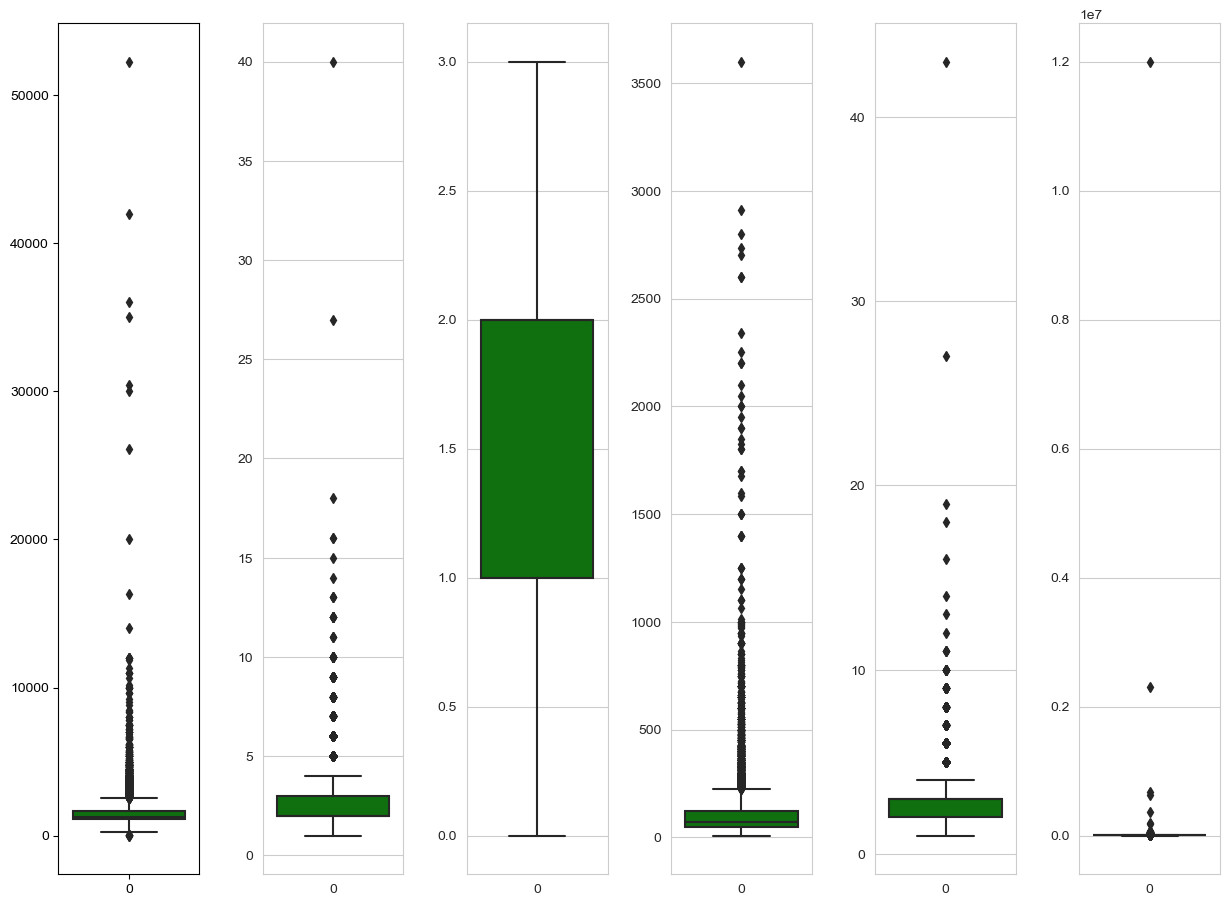

In [36]:
l = df_8.columns.values
print(l)
number_of_columns=8
number_of_rows = len(l)-1//number_of_columns
plt.figure(figsize=(2*number_of_columns,10*number_of_rows))
for i in range(2,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_8[l[i]],color='green',orient='v')
    plt.tight_layout()

df_8.groupby('location')['location'].agg('count').sort_values(ascending=False)

First let's look at price_per_sqft

In [37]:
df_8
df_8.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
Nan                   2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Kodigehalli             11
Pattandur Agrahara      11
HAL 2nd Stage           11
Doddaballapur           11
Nehru Nagar             11
Name: location, Length: 241, dtype: int64

considering we are given 300sqft/bhk to be the regular area

In [38]:
# price_per_bhk = df_8['price']/df_8['BHK']
# price_per_bhk.sort_values()
# len(price_per_bhk < 300)
# # df_8[~((df_8['total_sqft']/df_8['BHK']) < 300)]
df_9 = df_8.copy()
df_9.groupby('location')['location'].agg('count').sort_values(ascending=False)
# df_9 = df_9[~((df_9['total_sqft']/df_9['BHK']) >= 300)]
# df_9.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
Nan                   2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Kodigehalli             11
Pattandur Agrahara      11
HAL 2nd Stage           11
Doddaballapur           11
Nehru Nagar             11
Name: location, Length: 241, dtype: int64

In [39]:
# df_9 = df_8.copy()
df_10 = df_9[~((df_9['total_sqft']/df_9['BHK']) < 300)]
df_10.groupby('location')['location'].agg('count').sort_values()
# df_9['price_per_bhk'] = df_9['total_sqft']/df_9['BHK']
# df_10 = df_9[~(df_9['price_per_bhk'] < 300) & (df_9.location )]
# df_10.groupby('location')['location'].agg('count').sort_values().head(20)

location
Marsur                     5
5th Block Hbr Layout       7
Vishwapriya Layout         7
Vishveshwarya Layout       7
Banjara Layout             8
                        ... 
Kanakpura Road           262
Electronic City          295
Sarjapur  Road           388
Whitefield               532
Nan                     2557
Name: location, Length: 241, dtype: int64

we will be finding the price_per_sqft as per the location & we will be removing the outliers based on the mean, std. deviation of that location

only including those values ubder 1 std. deviation

In [40]:
df_9.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,1.602348,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,0.804268,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,2.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [41]:
def remove_outlier_by_location(df):
    df_out = pd.DataFrame()
    for key, value in df.groupby('location'):
        mean = np.mean(value.price_per_sqft)
        std = np.std(value.price_per_sqft)
        reduced_df = value[(value.price_per_sqft > (mean - std)) & (value.price_per_sqft < (mean + std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [42]:
df_11 = remove_outlier_by_location(df_10)
df_11

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3.0,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...,...,...
10237,Super built-up Area,Yeshwanthpur,1676.0,3.0,2.0,92.13,3.0,5497.016706
10238,Super built-up Area,Yeshwanthpur,2503.0,3.0,3.0,138.00,3.0,5513.383939
10239,Super built-up Area,Yeshwanthpur,1855.0,3.0,3.0,135.00,3.0,7277.628032
10240,Super built-up Area,Yeshwanthpur,1876.0,3.0,3.0,160.00,3.0,8528.784648


Now, we also have to check for a particular locality if the price of x bhk > y bhk only if x > y 

In [43]:
def scatter_plots(df,location):
    bhk_2 = df[(df.location == location) & (df.BHK == 2)]
    bhk_3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk_2.total_sqft, bhk_2.price, color = 'red', label = '2 BHK', s=30)
    plt.scatter(bhk_3.total_sqft, bhk_3.price, marker ='*',color = 'green', label = '3 BHK', s=50)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price per sqft")
    plt.title(location)
    plt.legend()

In [44]:
df_10.groupby('location')['location'].agg('count').sort_values().head(20)

location
Marsur                        5
5th Block Hbr Layout          7
Vishwapriya Layout            7
Vishveshwarya Layout          7
Banjara Layout                8
Kodigehalli                   8
Mahalakshmi Layout            9
2nd Stage Nagarbhavi          9
Nagasandra                    9
Shampura                      9
HAL 2nd Stage                 9
1st Block Jayanagar          10
ISRO Layout                  10
Tindlu                       10
Laggere                      10
Bommenahalli                 10
Shivaji Nagar                10
Giri Nagar                   10
2nd Phase Judicial Layout    11
Nehru Nagar                  11
Name: location, dtype: int64

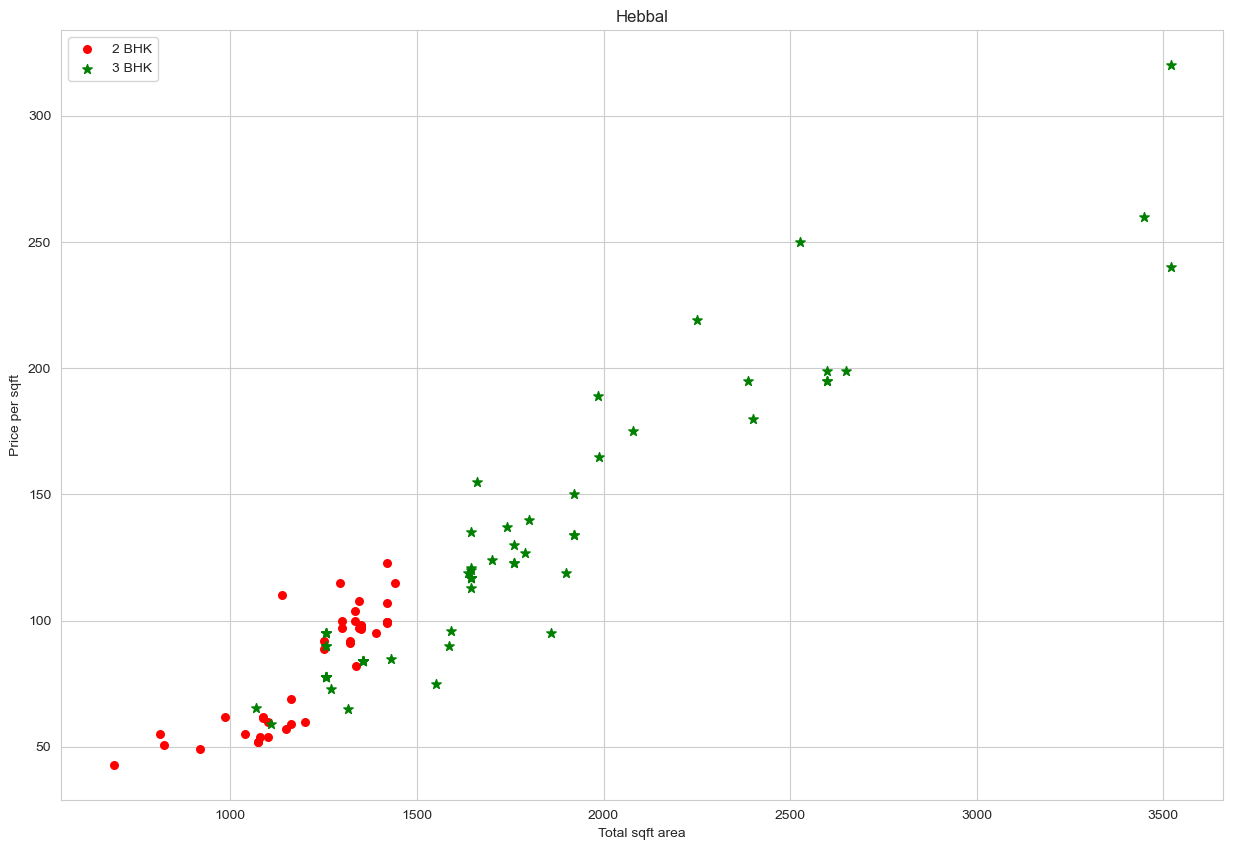

In [45]:
scatter_plots(df_11,"Hebbal")

Few 2 bhk have more price than 3 bhk for same sqft area

we will calculate mean, std, count per bhk

We will remove those 2 bhk apartments price_per_sqft is less than mean of 1 bhk price_per_sqft 

In [46]:
df_11.groupby('BHK')['BHK'].agg('count')

BHK
1.0      518
2.0     4756
3.0     4002
4.0      745
5.0      108
6.0       62
7.0       20
8.0       16
9.0        8
10.0       3
11.0       2
13.0       1
16.0       1
Name: BHK, dtype: int64

In [47]:
def remove_bhk_outliers(df):
    final = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_status = {}    
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_status[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0] 
                }
        for bhk, bhk_df in location_df.groupby('BHK'):
            status = bhk_status.get(bhk-1)
            if status and status['count'] > 5:
                final = np.append(final, bhk_df[bhk_df.price_per_sqft < (status['mean'])].index)
    return df.drop(final,axis='index')

In [48]:
df_12 = remove_bhk_outliers(df_11)
df_12

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0,11983.805668
...,...,...,...,...,...,...,...,...
10231,Super built-up Area,Yeshwanthpur,1195.0,2.0,2.0,100.0,2.0,8368.200837
10232,Super built-up Area,Yeshwanthpur,1692.0,3.0,3.0,108.0,3.0,6382.978723
10234,Built-up Area,Yeshwanthpur,2500.0,5.0,2.0,185.0,6.0,7400.000000
10239,Super built-up Area,Yeshwanthpur,1855.0,3.0,3.0,135.0,3.0,7277.628032


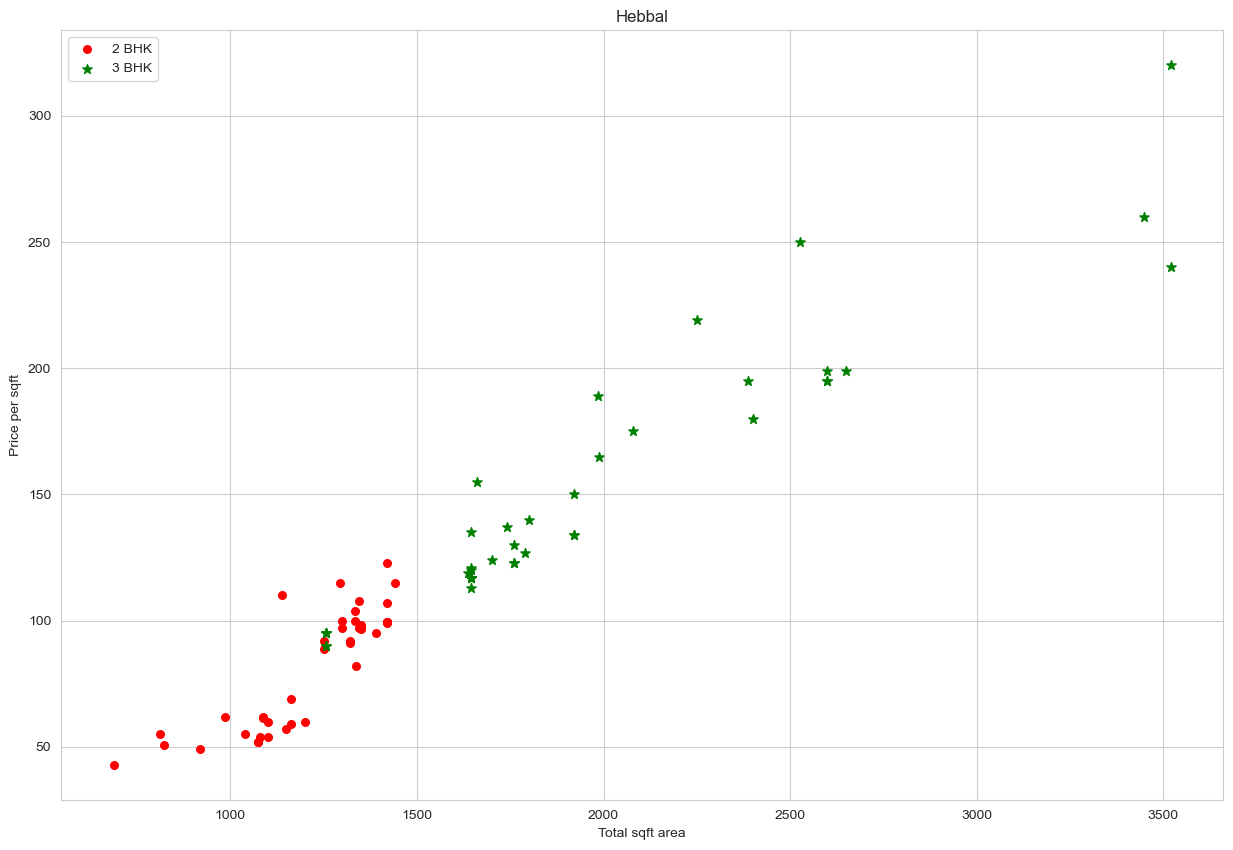

In [49]:
scatter_plots(df_12,"Hebbal")

We can observe significant reduction in green stars towards the left of the graph

Now we will check the number of properties in a certain price_per_sqft using Histogram

Text(0, 0.5, 'Count')

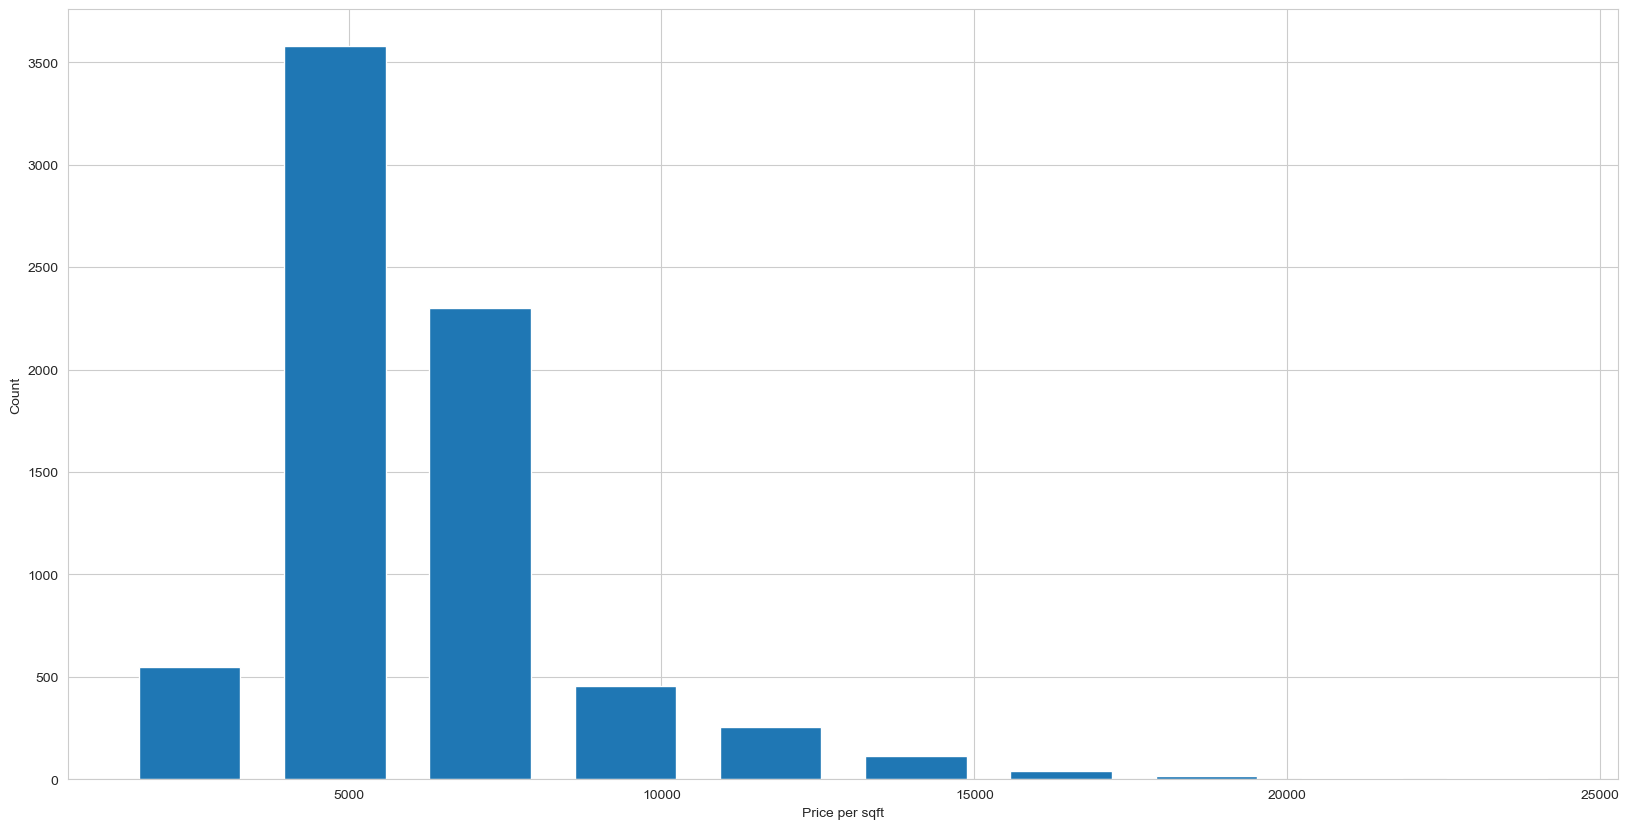

In [50]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df_12.price_per_sqft, rwidth=0.7)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

This resembles nornmal distribution

In [51]:
df_12[df_12.bath > 10]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
5808,Super built-up Area,Nan,12000.0,12.0,2.0,525.0,10.0,4375.000000
5897,Super built-up Area,Nan,10000.0,16.0,2.0,550.0,16.0,5500.000000
6631,Super built-up Area,Nan,6000.0,12.0,2.0,150.0,11.0,2500.000000
6962,Super built-up Area,Nan,5425.0,13.0,0.0,275.0,13.0,5069.124424
7583,Super built-up Area,Neeladri Nagar,4000.0,12.0,2.0,160.0,10.0,4000.000000


We are considering only those cases where number of bathrooms < number of bedrooms + 2

Text(0, 0.5, 'Count')

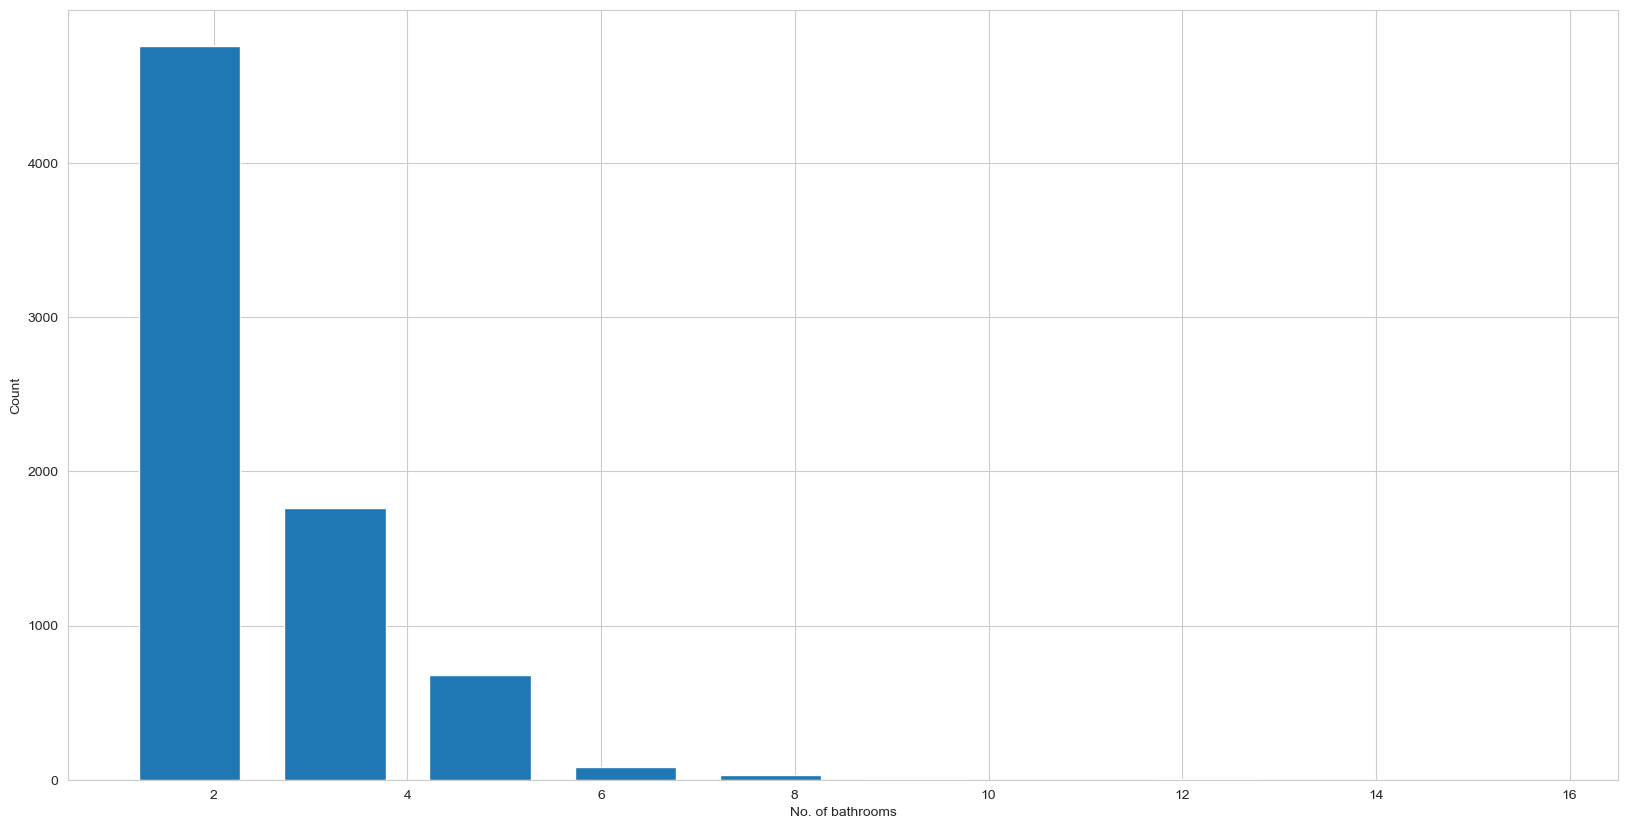

In [52]:
plt.hist(df_12.bath, rwidth=0.7)
plt.xlabel("No. of bathrooms")
plt.ylabel("Count")

Let's remove outliers

In [53]:
df_13 = df_12[df_12.bath < df_12.BHK + 2]
df_13

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0,11983.805668
...,...,...,...,...,...,...,...,...
10231,Super built-up Area,Yeshwanthpur,1195.0,2.0,2.0,100.0,2.0,8368.200837
10232,Super built-up Area,Yeshwanthpur,1692.0,3.0,3.0,108.0,3.0,6382.978723
10234,Built-up Area,Yeshwanthpur,2500.0,5.0,2.0,185.0,6.0,7400.000000
10239,Super built-up Area,Yeshwanthpur,1855.0,3.0,3.0,135.0,3.0,7277.628032


Now for ML model, we do not require price_per_sqft so we will drop it

In [54]:
df_14 = df_13.drop(columns=['price_per_sqft','area_type','balcony'], axis=1)
df_14

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0
...,...,...,...,...,...
10231,Yeshwanthpur,1195.0,2.0,100.0,2.0
10232,Yeshwanthpur,1692.0,3.0,108.0,3.0
10234,Yeshwanthpur,2500.0,5.0,185.0,6.0
10239,Yeshwanthpur,1855.0,3.0,135.0,3.0


Converting location into numerical

In [55]:
df_14.groupby('location')['location'].agg('count')

location
1st Block Jayanagar           7
1st Phase JP Nagar           16
2nd Phase Judicial Layout     8
2nd Stage Nagarbhavi          4
5th Block Hbr Layout          6
                             ..
Yelachenahalli               11
Yelahanka                    86
Yelahanka New Town           24
Yelenahalli                   8
Yeshwanthpur                 37
Name: location, Length: 241, dtype: int64

In [56]:
dummies = pd.get_dummies(df_14['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10234,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [57]:
df_14

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0
...,...,...,...,...,...
10231,Yeshwanthpur,1195.0,2.0,100.0,2.0
10232,Yeshwanthpur,1692.0,3.0,108.0,3.0
10234,Yeshwanthpur,2500.0,5.0,185.0,6.0
10239,Yeshwanthpur,1855.0,3.0,135.0,3.0


In [58]:
df_15 = pd.concat([df_14, dummies], axis ='columns')
df_15

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,Yeshwanthpur,1195.0,2.0,100.0,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10232,Yeshwanthpur,1692.0,3.0,108.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10234,Yeshwanthpur,2500.0,5.0,185.0,6.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10239,Yeshwanthpur,1855.0,3.0,135.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [59]:
df_16 = df_15.copy()
df_16.drop(['location'], axis=1, inplace=True)
df_16

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,1195.0,2.0,100.0,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10232,1692.0,3.0,108.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10234,2500.0,5.0,185.0,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10239,1855.0,3.0,135.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [60]:
X = df_16.drop(['price'], axis=1)
Y = df_16['price']

# ML MODEL

In [61]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=50)
X_train

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
3261,1081.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8099,1440.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4740,1397.0,3.0,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5233,1080.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
818,1200.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,1071.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8703,1700.0,3.0,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2420,1100.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7849,1050.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
from sklearn.linear_model import LinearRegression
lr_cf = LinearRegression()
lr_cf.fit(X_train,Y_train)
lr_cf.predict(x_test)
lr_cf.score(x_test, y_test)

0.8518446387326584

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)
cross_val_score(LinearRegression(), X, Y, cv= cv)


array([0.85172546, 0.83397942, 0.83538969, 0.7801413 , 0.8596069 ])

# Gridsearch cv

In [64]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [65]:


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=124)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [66]:
find_best_model_using_gridsearchcv(X,Y)

c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.840489,{}
1,lasso,0.705446,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.698837,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Price prediction

In [67]:
a = np.where(df_16.columns == 'Yeshwanthpur')[0][0]
# len(df_16.columns)
a
df_16.iloc[:,a]

0        False
1        False
2        False
3        False
4        False
         ...  
10231     True
10232     True
10234     True
10239     True
10240     True
Name: Yeshwanthpur, Length: 7239, dtype: bool

In [68]:
def predict_price(df, location, total_sqft, bath, bhk):
        location_indices = np.where(df.columns == location)[0][0]
        # print(location_indices)
        x = np.zeros(len(df.columns))
        x[0] = total_sqft
        x[1] = bath
        x[2] = bhk
        if location_indices >= 0:
                x[location_indices] = 1
        # print(x)        
        return lr_cf.predict([x])[0]

In [69]:
predict_price(X,"1st Phase JP Nagar",1000,2,2)

c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.8222713470459

It may be the case, the number of bhk > number of bathroom, gives the price to be lesser

In [70]:
predict_price(X,"1st Phase JP Nagar",1000,2,4)

c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.11236763000488

In [71]:
predict_price(X,"Indira Nagar",1000,2,2)

c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


188.19837188720703

In [72]:
predict_price(X,"Indira Nagar",1000,3,3)

c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


189.01078987121582

In [73]:
predict_price(X,"Indira Nagar",1000,2,8)

c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


177.06866455078125